# Temperature

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

weather_df = pd.read_csv('weatherHistory.csv')
weather_df.head(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


In [2]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# 1. Assumption one: linearity of the model in the coefficients

In [3]:
X = weather_df[['Humidity','Pressure (millibars)','Wind Bearing (degrees)','Wind Speed (km/h)']]


Y = weather_df['Temperature (C)']

In [4]:
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

#predictions =  lrm.predict(weather_df[['Humidity', 'Pressure (millibars)','Wind Bearing (degrees)', 'Wind Speed (km/h)']])
predictions =  lrm.predict(X)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -6.91759209e-04  4.04836936e-03 -2.01413742e-01]

Intercept: 
 37.926438185285384


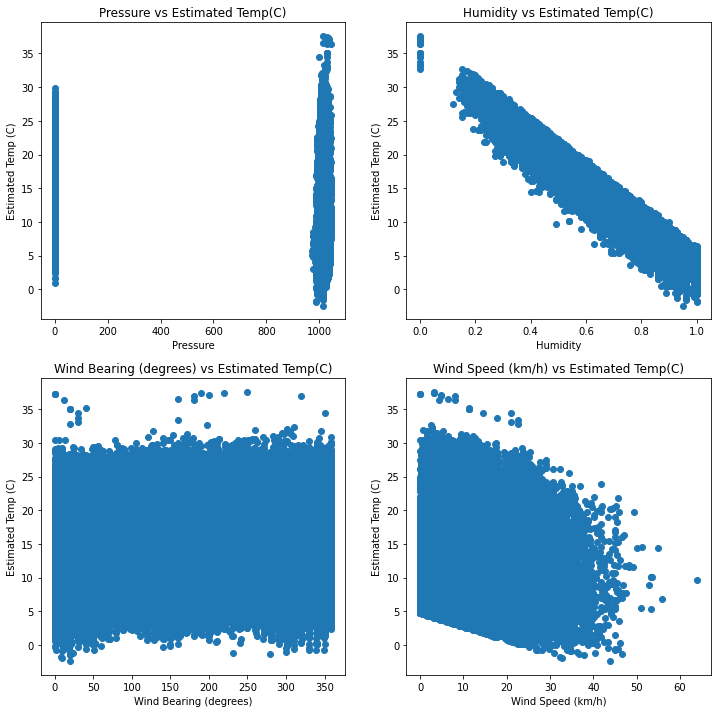

In [5]:
plt.figure(figsize= (12,12))

plt.subplot(221)
plt.scatter(weather_df["Pressure (millibars)"], predictions)
plt.xlabel("Pressure")
plt.ylabel("Estimated Temp (C)")
plt.title('Pressure vs Estimated Temp(C)')

plt.subplot(222)
plt.scatter(weather_df["Humidity"], predictions)
plt.xlabel("Humidity")
plt.ylabel("Estimated Temp (C)")
plt.title('Humidity vs Estimated Temp(C)')

plt.subplot(223)
plt.scatter(weather_df["Wind Bearing (degrees)"], predictions)
plt.xlabel("Wind Bearing (degrees)")
plt.ylabel("Estimated Temp (C)")
plt.title('Wind Bearing (degrees) vs Estimated Temp(C)')

plt.subplot(224)
plt.scatter(weather_df["Wind Speed (km/h)"], predictions)
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Estimated Temp (C)")
plt.title('Wind Speed (km/h) vs Estimated Temp(C)')

plt.show()

# 2. Assumption two: the error term should be zero on average

In [6]:
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 4.03891753518824e-15


# 3. Assumption three: homoscedasticity

In [7]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

# 4. Assumption four: low multicollinearity

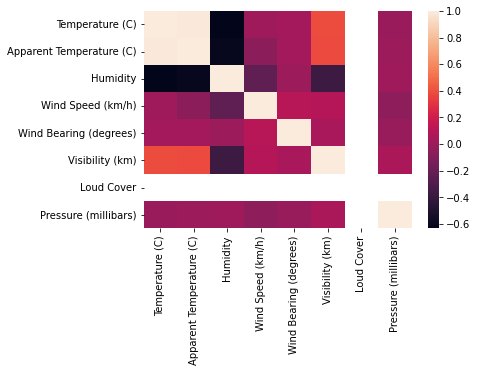

In [8]:
corr = weather_df.corr()

sns.heatmap(corr, data=weather_df)

In [9]:
#to see the correlation between the variables.
for index in corr.columns:
  print(corr[index].sort_values(ascending=False))
  print("---------------"*3)

Temperature (C)             1.000
Apparent Temperature (C)    0.993
Visibility (km)             0.393
Wind Bearing (degrees)      0.030
Wind Speed (km/h)           0.009
Pressure (millibars)       -0.005
Humidity                   -0.632
Loud Cover                    nan
Name: Temperature (C), dtype: float64
---------------------------------------------
Apparent Temperature (C)    1.000
Temperature (C)             0.993
Visibility (km)             0.382
Wind Bearing (degrees)      0.029
Pressure (millibars)       -0.000
Wind Speed (km/h)          -0.057
Humidity                   -0.603
Loud Cover                    nan
Name: Apparent Temperature (C), dtype: float64
---------------------------------------------
Humidity                    1.000
Pressure (millibars)        0.005
Wind Bearing (degrees)      0.001
Wind Speed (km/h)          -0.225
Visibility (km)            -0.369
Apparent Temperature (C)   -0.603
Temperature (C)            -0.632
Loud Cover                    nan
Name: H

So our variables are in low collinearity.

# 5. Assumption five: error terms should be uncorrelated with one other

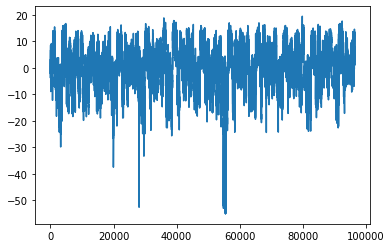

In [10]:
plt.plot(errors)
plt.show()

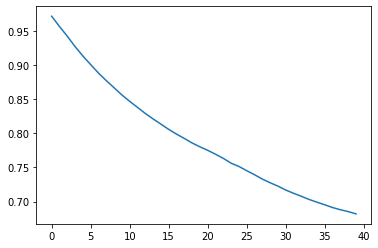

In [11]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

So, the autocorrelation between the errors is respectively high(ranging between 0.65 & 0.98)

# 6. Assumption six: features shouldn't be correlated with the errors

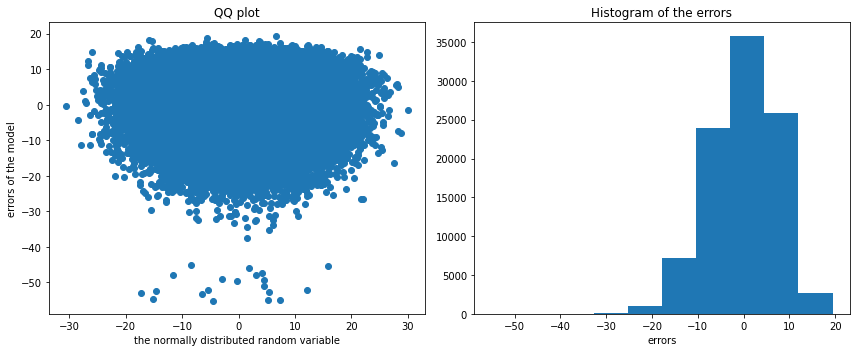

In [12]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252353 and p value is 0.0
Normality test statistics is 3375.4323076995734 and p value is 0.0


By the p-values, we can say that our errors are normally distributed.

In [14]:
import statsmodels.api as sm

# We need to add constant manually 
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:26:01   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""